In [1]:
!pip install google-play-scraper

In [2]:
from google_play_scraper import app

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Scraping BSI Mobile

In [3]:
from google_play_scraper import Sort, reviews
from datetime import datetime, timedelta

result, continuation_token = reviews(
    'com.bsm.activity',
    lang='id', # default to 'en'
    country='id', # default to us
    sort=Sort.NEWEST, # default to MOST_RELEVANT, you can change to NEWEST
    count=1000, #default to 100
    filter_score_with= None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [4]:
df_1 = pd.DataFrame(np.array(result), columns=['review'])

df_1 = df_1.join(pd.DataFrame(df_1.pop('review').tolist()))

In [5]:
df_1.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tariamin Saragih,https://play-lh.googleusercontent.com/a/ACg8oc...,Tdk pake.,1,0,None,2022-06-26 13:20:14,None,NaT,None
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,rani khaerani,https://play-lh.googleusercontent.com/a-/ALV-U...,GOOD,5,0,5.05.0,2021-09-25 13:26:04,None,NaT,5.05.0
2,efae59b6-cb54-4221-8089-0c511ae56a28,Idris Saepul,https://play-lh.googleusercontent.com/a-/ALV-U...,Ok,5,0,None,2021-09-19 09:48:21,None,NaT,None
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,Marwan Hadi,https://play-lh.googleusercontent.com/a-/ALV-U...,"Sering eror, mohon di perbaiki sistemnya",5,0,BSM Mobile ver 4.2.1,2021-08-03 14:40:21,None,NaT,BSM Mobile ver 4.2.1
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Edi Suwardi,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi yang sangat bagus dan bermanfaat,5,0,None,2021-06-27 06:51:20,None,NaT,None


In [6]:
df_1['at'].sort_values(ascending=False)

0     2022-06-26 13:20:14
1     2021-09-25 13:26:04
2     2021-09-19 09:48:21
3     2021-08-03 14:40:21
4     2021-06-27 06:51:20
              ...        
995   2017-05-22 15:38:48
996   2017-05-22 14:59:05
997   2017-05-22 11:58:42
998   2017-05-22 11:47:40
999   2017-05-22 02:38:45
Name: at, Length: 1000, dtype: datetime64[ns]

In [7]:
df_1 = df_1.rename(columns={'score': 'rating'})

In [8]:
df_bsi = df_1[['reviewId', 'content', 'rating', 'at']]

df_bsi.head()

,reviewId,content,rating,at
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,2022-06-26 13:20:14
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,2021-09-25 13:26:04
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,2021-09-19 09:48:21
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,2021-08-03 14:40:21
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,2021-06-27 06:51:20


In [9]:
df_bsi.head()

,reviewId,content,rating,at
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,2022-06-26 13:20:14
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,2021-09-25 13:26:04
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,2021-09-19 09:48:21
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,2021-08-03 14:40:21
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,2021-06-27 06:51:20


In [10]:
df_bsi['rating'].value_counts().sort_index()

1    199
2    132
3    158
4    107
5    404
Name: rating, dtype: int64

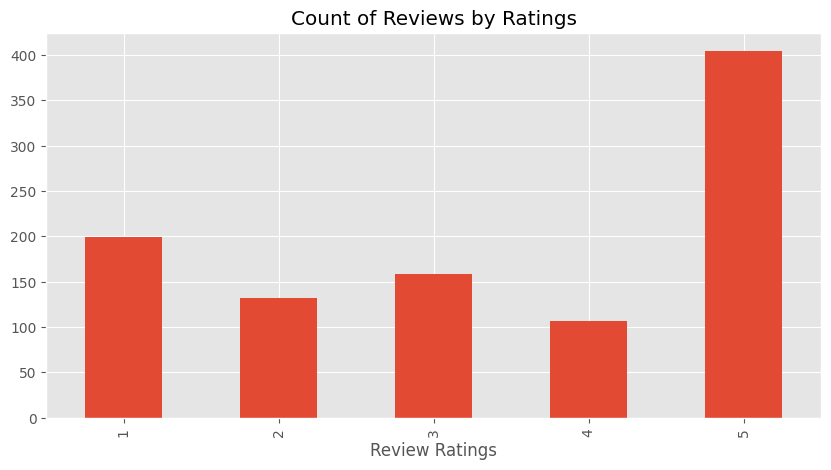

In [11]:
ax = df_bsi['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title= 'Count of Reviews by Ratings',
          figsize=(10,5))
ax.set_xlabel('Review Ratings')

plt.show()

<Axes: xlabel='rating'>

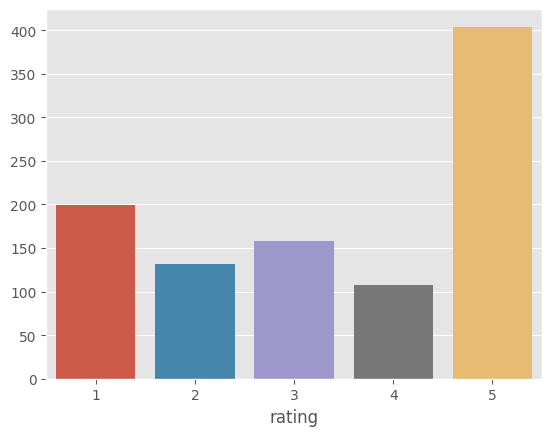

In [12]:
rating = df_bsi.groupby(['rating']).size()

# plot the rating using sns
sns.barplot(x = rating.index, y = rating.values)

In [13]:
df_bsi['rating'].mean()

3.385

## Labeling sentiment

In [14]:
sentiment = []
# iterate through the DataFrame and assign sentiment labels
for index, row in df_bsi.iterrows():
  if row['rating'] > 3:
    sentiment.append("positive")
  elif row['rating'] == 3:
    sentiment.append("neutral")
  else:
    sentiment.append("negative")

df_bsi['sentiment'] = sentiment

df_bsi.head()

<ipython-input-14-40573d1309d8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bsi['sentiment'] = sentiment


,reviewId,content,rating,at,sentiment
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,2022-06-26 13:20:14,negative
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,2021-09-25 13:26:04,positive
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,2021-09-19 09:48:21,positive
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,2021-08-03 14:40:21,positive
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,2021-06-27 06:51:20,positive


## Sentiment Distribution

<Axes: xlabel='sentiment'>

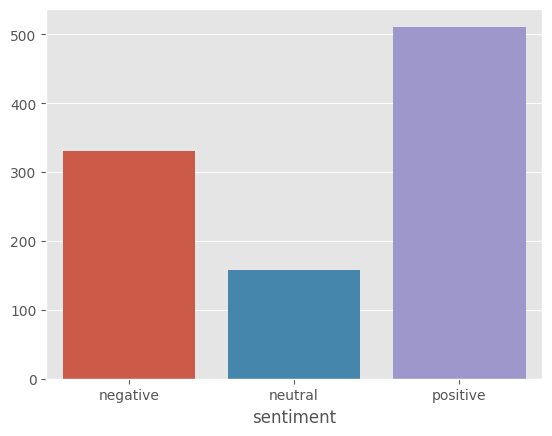

In [15]:
# Sentiment distribution
result_2 = df_bsi.groupby(['sentiment']).size()

# plot the sentiment using sns
sns.barplot(x = result_2.index, y = result_2.values)

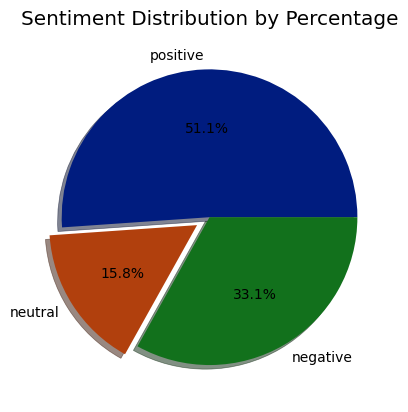

In [16]:
# Pie Chart
data_pie = df_bsi['sentiment'].value_counts().sort_index(ascending=False)
keys = data_pie.index
palette_color = sns.color_palette('dark')

#plotting
plt.pie(data_pie, labels = keys, colors=palette_color, explode=[0, 0.1 , 0], autopct='%1.1f%%', shadow=True)
plt.title(f"Sentiment Distribution by Percentage")

plt.show()

## Add new column (bank_name)

In [17]:
bank_name_1 = "Bank Syariah Indonesia"

df_bsi['bank_name'] = bank_name_1

df_bsi

<ipython-input-17-076f4c120313>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bsi['bank_name'] = bank_name_1


,reviewId,content,rating,at,sentiment,bank_name
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,2022-06-26 13:20:14,negative,Bank Syariah Indonesia
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,2021-09-25 13:26:04,positive,Bank Syariah Indonesia
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,2021-09-19 09:48:21,positive,Bank Syariah Indonesia
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,2021-08-03 14:40:21,positive,Bank Syariah Indonesia
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,2021-06-27 06:51:20,positive,Bank Syariah Indonesia
...,...,...,...,...,...,...
995,a329403f-b9e6-406f-abe4-fc1ffbfdd7d6,Poor aplikasi system...,3,2017-05-22 15:38:48,neutral,Bank Syariah Indonesia
996,437c9942-4c4a-47e6-9bb4-2053d4c07a47,Coba dulu,3,2017-05-22 14:59:05,neutral,Bank Syariah Indonesia
997,56971d07-85b5-4834-bd48-d55be987e77f,"Alhamdulillah sekarang lebih, mudah semoga bia...",4,2017-05-22 11:58:42,positive,Bank Syariah Indonesia
998,868487ec-b811-450f-9b8d-4a25a711bac6,Kok sering gangguan ya apkanya...???,3,2017-05-22 11:47:40,neutral,Bank Syariah Indonesia


In [18]:
# check null value

df_bsi.isnull().sum()

reviewId     0
content      1
rating       0
at           0
sentiment    0
bank_name    0
dtype: int64

In [19]:
df_bsi = df_bsi.dropna()

df_bsi.isnull().sum()

reviewId     0
content      0
rating       0
at           0
sentiment    0
bank_name    0
dtype: int64

# Scraping Muamalat DIN

In [20]:
result, continuation_token = reviews(
    'com.muamalatdin',
    lang='id', # default to 'en'
    country='id', # default to us
    sort=Sort.NEWEST, # default to MOST_RELEVANT
    count=1000, #default to 100
    filter_score_with= None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [21]:
df_2 = pd.DataFrame(np.array(result), columns=['review'])

df_2 = df_2.join(pd.DataFrame(df_2.pop('review').tolist()))

In [22]:
df_2.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1b780edb-4beb-49a9-aa15-a55d92cc9f88,Aisyah Fahrin,https://play-lh.googleusercontent.com/a/ACg8oc...,Setelah di update jadi tidak bisa di buka.. Ka...,1,0,1.6.6.1,2023-11-01 05:29:11,Salam Ibu Aisyah. Mohon maaf atas ketidaknyama...,2023-11-01 09:37:22,1.6.6.1
1,be1cb2d6-8959-4fe4-8d95-42c9400f726f,munirah ekis13,https://play-lh.googleusercontent.com/a/ACg8oc...,Kurang baik aplikasinya,1,0,1.6.5,2023-11-01 03:05:24,Salam Ibu Munirah. Kami tidak menemukan data I...,2023-11-01 09:30:52,1.6.5
2,7e33fe6d-2fb0-4876-8ebc-37eb1a6d56ec,Junaidin Sirzam,https://play-lh.googleusercontent.com/a-/ALV-U...,Admint ko baru 2 hari update minta update lagi...,1,0,1.6.5,2023-11-01 01:17:45,Salam Bapak Junaidin. Kami tidak menemukan dat...,2023-11-01 06:30:48,1.6.5
3,5a26cc1c-1348-4817-951b-74fc56fe4fad,Siti Zaenab,https://play-lh.googleusercontent.com/a/ACg8oc...,Sangat membantu,5,0,1.6.6.1,2023-11-01 00:48:29,Salam Ibu Siti Zaenab. Terima kasih atas ulasa...,2023-11-01 01:01:04,1.6.6.1
4,aee11389-b15c-4ca8-8d64-82bb3be50292,Muhammad zayyin,https://play-lh.googleusercontent.com/a/ACg8oc...,Berkah&sukses,5,0,1.5.4,2023-11-01 00:33:03,Salam Bapak Muhammad Zayyin. Terima kasih atas...,2023-11-01 00:42:56,1.5.4


In [23]:
df_2['at'].sort_values(ascending=False)

0     2023-11-01 05:29:11
1     2023-11-01 03:05:24
2     2023-11-01 01:17:45
3     2023-11-01 00:48:29
4     2023-11-01 00:33:03
              ...        
995   2022-10-08 09:17:51
996   2022-10-08 08:14:47
997   2022-10-08 08:01:16
998   2022-10-08 07:46:43
999   2022-10-08 06:59:29
Name: at, Length: 1000, dtype: datetime64[ns]

In [24]:
df_2 = df_2.rename(columns={'score': 'rating'})

In [25]:
df_muamalat = df_2[['reviewId', 'content', 'rating', 'at']]

df_muamalat.head()

,reviewId,content,rating,at
0,1b780edb-4beb-49a9-aa15-a55d92cc9f88,Setelah di update jadi tidak bisa di buka.. Ka...,1,2023-11-01 05:29:11
1,be1cb2d6-8959-4fe4-8d95-42c9400f726f,Kurang baik aplikasinya,1,2023-11-01 03:05:24
2,7e33fe6d-2fb0-4876-8ebc-37eb1a6d56ec,Admint ko baru 2 hari update minta update lagi...,1,2023-11-01 01:17:45
3,5a26cc1c-1348-4817-951b-74fc56fe4fad,Sangat membantu,5,2023-11-01 00:48:29
4,aee11389-b15c-4ca8-8d64-82bb3be50292,Berkah&sukses,5,2023-11-01 00:33:03


In [26]:
df_muamalat['rating'].value_counts().sort_index()

1    215
2     75
3     72
4     54
5    584
Name: rating, dtype: int64

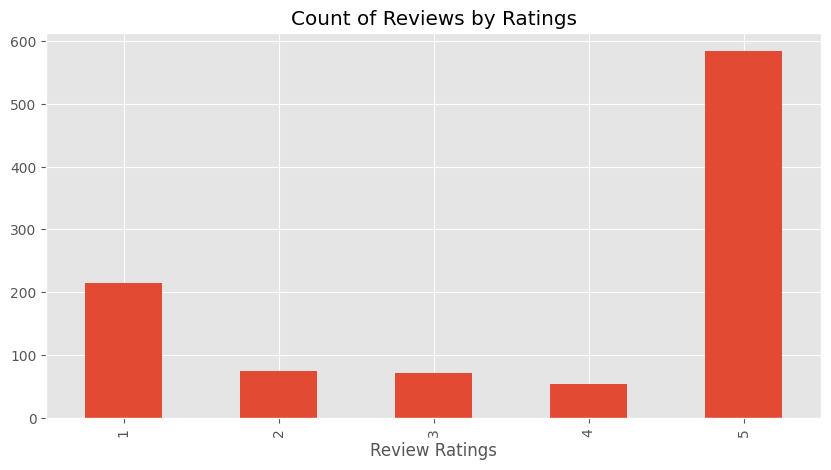

In [27]:
ax = df_muamalat['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title= 'Count of Reviews by Ratings',
          figsize=(10,5))
ax.set_xlabel('Review Ratings')

plt.show()

In [28]:
df_muamalat['rating'].mean()

3.717

## Labeling Sentiment

In [29]:
sentiment = []
# iterate through the DataFrame and assign sentiment labels
for index, row in df_muamalat.iterrows():
  if row['rating'] > 3:
    sentiment.append("positive")
  elif row['rating'] == 3:
    sentiment.append("neutral")
  else:
    sentiment.append("negative")

df_muamalat['sentiment'] = sentiment

df_muamalat.head()

<ipython-input-29-eea4c4865902>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muamalat['sentiment'] = sentiment


,reviewId,content,rating,at,sentiment
0,1b780edb-4beb-49a9-aa15-a55d92cc9f88,Setelah di update jadi tidak bisa di buka.. Ka...,1,2023-11-01 05:29:11,negative
1,be1cb2d6-8959-4fe4-8d95-42c9400f726f,Kurang baik aplikasinya,1,2023-11-01 03:05:24,negative
2,7e33fe6d-2fb0-4876-8ebc-37eb1a6d56ec,Admint ko baru 2 hari update minta update lagi...,1,2023-11-01 01:17:45,negative
3,5a26cc1c-1348-4817-951b-74fc56fe4fad,Sangat membantu,5,2023-11-01 00:48:29,positive
4,aee11389-b15c-4ca8-8d64-82bb3be50292,Berkah&sukses,5,2023-11-01 00:33:03,positive


## Sentiment Distribution

<Axes: xlabel='sentiment'>

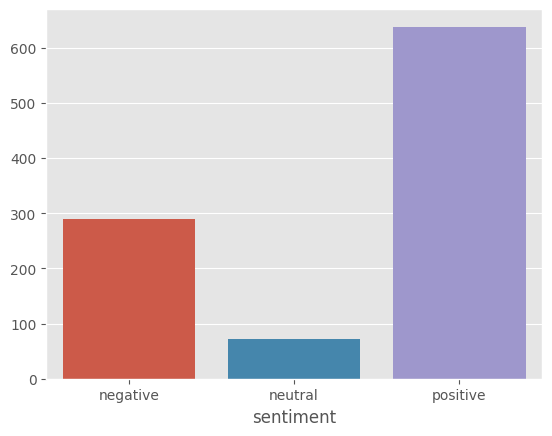

In [30]:
# Sentiment distribution
result_muamalat = df_muamalat.groupby(['sentiment']).size()

# plot the sentiment using sns
sns.barplot(x = result_muamalat.index, y = result_muamalat.values)

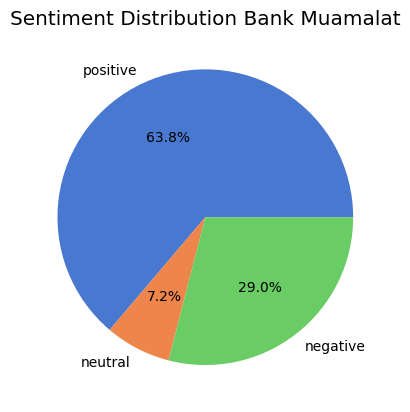

In [31]:
# Pie Chart
data_pie_m = df_muamalat['sentiment'].value_counts().sort_index(ascending=False)
keys = data_pie_m.index
palette_color = sns.color_palette('muted')

#plotting
plt.pie(data_pie_m, labels = keys, colors=palette_color, autopct='%1.1f%%')
plt.title(f"Sentiment Distribution Bank Muamalat")

plt.show()

## Add new column (bank name)

In [32]:
bank_name_2 = "Bank Muamalat"

df_muamalat['bank_name'] = bank_name_2

df_muamalat

<ipython-input-32-0ddc1faa88d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muamalat['bank_name'] = bank_name_2


,reviewId,content,rating,at,sentiment,bank_name
0,1b780edb-4beb-49a9-aa15-a55d92cc9f88,Setelah di update jadi tidak bisa di buka.. Ka...,1,2023-11-01 05:29:11,negative,Bank Muamalat
1,be1cb2d6-8959-4fe4-8d95-42c9400f726f,Kurang baik aplikasinya,1,2023-11-01 03:05:24,negative,Bank Muamalat
2,7e33fe6d-2fb0-4876-8ebc-37eb1a6d56ec,Admint ko baru 2 hari update minta update lagi...,1,2023-11-01 01:17:45,negative,Bank Muamalat
3,5a26cc1c-1348-4817-951b-74fc56fe4fad,Sangat membantu,5,2023-11-01 00:48:29,positive,Bank Muamalat
4,aee11389-b15c-4ca8-8d64-82bb3be50292,Berkah&sukses,5,2023-11-01 00:33:03,positive,Bank Muamalat
...,...,...,...,...,...,...
995,f472651f-f1bb-47e2-968b-2a927e4b04cf,Selalu setia pake muamalat din,5,2022-10-08 09:17:51,positive,Bank Muamalat
996,abf0ca16-caec-4aea-bd88-1f2746d3a635,Keseringan minta update..... Masukan : jangan ...,4,2022-10-08 08:14:47,positive,Bank Muamalat
997,956a8aaa-26bd-4e11-8d33-32052e611834,Amanah dan aman makin betah nabung dan transak...,5,2022-10-08 08:01:16,positive,Bank Muamalat
998,d0e6add1-39fe-48f0-8c91-1b731044c159,Lebih bagus,5,2022-10-08 07:46:43,positive,Bank Muamalat


In [33]:
# Check Null Value
df_muamalat.isnull().sum()

reviewId     0
content      0
rating       0
at           0
sentiment    0
bank_name    0
dtype: int64

# Scraping Bank Aceh

In [34]:
result, continuation_token = reviews(
    'com.aceh.action',
    lang='id', # default to 'en'
    country='id', # default to us
    sort=Sort.NEWEST, # default to MOST_RELEVANT
    count=1000, #default to 100
    filter_score_with= None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [35]:
df_3 = pd.DataFrame(np.array(result), columns=['review'])

df_3 = df_3.join(pd.DataFrame(df_3.pop('review').tolist()))

In [36]:
df_3.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,da56a8ee-f3fa-4022-848e-6c557f26379a,Mulyana,https://play-lh.googleusercontent.com/a/ACg8oc...,Gimana sih iniii password sama username nya sa...,2,0,1.2.3,2023-10-31 14:05:50,Mohon maaf atas ketidaknyamanan yang Bapak/Ibu...,2023-11-02 02:21:19,1.2.3
1,d8705599-f3ab-42bf-9efd-f735a1cea63e,Bung Fata,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasinya sudah bagu, namun pembayaran payme...",3,0,1.2.2,2023-10-31 02:37:13,Mohon maaf atas ketidaknyamanan yang Bapak/Ibu...,2023-11-02 02:22:29,1.2.2
2,4a207011-0536-44ec-95b9-e44100f35a74,RINDANG SYAMSUDIN,https://play-lh.googleusercontent.com/a-/ALV-U...,kartu ATM nya gratis gak,1,0,None,2023-10-31 02:13:39,Mohon maaf atas ketidaknyamanan yang Bapak/Ibu...,2023-11-02 02:21:53,None
3,b0f8c886-3bf1-48dd-9f1c-fae19373f26d,Muhammad Saryulis,https://play-lh.googleusercontent.com/a-/ALV-U...,"untuk saat ini udah bagus, cuman. tambahkan ew...",4,0,1.2.2,2023-10-28 02:34:26,Mohon maaf atas ketidaknyamanan yang Bapak/Ibu...,2023-02-21 03:50:34,1.2.2
4,819a7403-fae2-4dcd-8124-9c4be57be616,Hery Afrizal,https://play-lh.googleusercontent.com/a-/ALV-U...,Tolong top up dananya di tambahkan... Karena s...,1,0,1.2.2,2023-10-24 15:32:35,Mohon maaf atas ketidaknyamanan yang Bapak/Ibu...,2023-10-16 08:23:04,1.2.2


In [37]:
df_3['at'].sort_values(ascending=False)

0     2023-10-31 14:05:50
1     2023-10-31 02:37:13
2     2023-10-31 02:13:39
3     2023-10-28 02:34:26
4     2023-10-24 15:32:35
              ...        
995   2022-04-30 09:44:23
996   2022-04-29 16:35:42
997   2022-04-29 16:35:32
998   2022-04-28 02:17:28
999   2022-04-27 05:16:21
Name: at, Length: 1000, dtype: datetime64[ns]

In [38]:
df_3 = df_3.rename(columns={'score': 'rating'})

In [39]:
df_aceh = df_3[['reviewId', 'content', 'rating', 'at']]

df_aceh.head()

,reviewId,content,rating,at
0,da56a8ee-f3fa-4022-848e-6c557f26379a,Gimana sih iniii password sama username nya sa...,2,2023-10-31 14:05:50
1,d8705599-f3ab-42bf-9efd-f735a1cea63e,"Aplikasinya sudah bagu, namun pembayaran payme...",3,2023-10-31 02:37:13
2,4a207011-0536-44ec-95b9-e44100f35a74,kartu ATM nya gratis gak,1,2023-10-31 02:13:39
3,b0f8c886-3bf1-48dd-9f1c-fae19373f26d,"untuk saat ini udah bagus, cuman. tambahkan ew...",4,2023-10-28 02:34:26
4,819a7403-fae2-4dcd-8124-9c4be57be616,Tolong top up dananya di tambahkan... Karena s...,1,2023-10-24 15:32:35


In [40]:
df_aceh['rating'].value_counts().sort_index()

1    188
2     55
3     93
4    101
5    563
Name: rating, dtype: int64

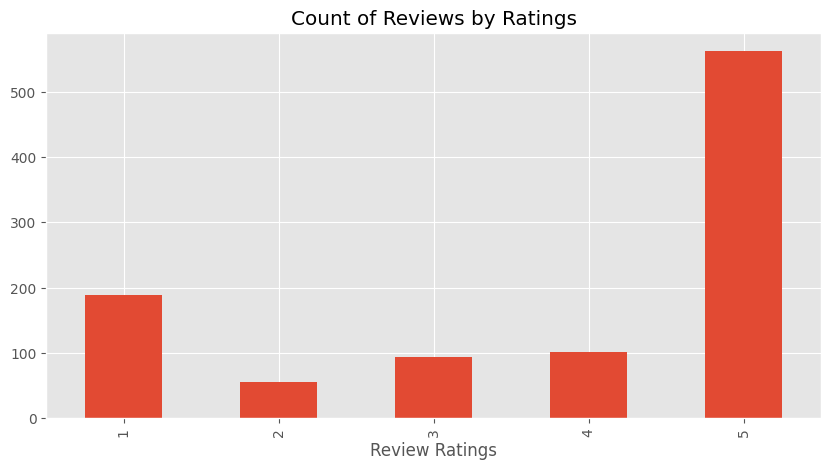

In [41]:
ax = df_aceh['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title= 'Count of Reviews by Ratings',
          figsize=(10,5))
ax.set_xlabel('Review Ratings')

plt.show()

In [42]:
df_aceh['rating'].mean()

3.796

## Labeling Sentiment

In [43]:
sentiment = []
# iterate through the DataFrame and assign sentiment labels
for index, row in df_aceh.iterrows():
  if row['rating'] > 3:
    sentiment.append("positive")
  elif row['rating'] == 3:
    sentiment.append("neutral")
  else:
    sentiment.append("negative")

df_aceh['sentiment'] = sentiment

df_aceh.head()

<ipython-input-43-1bafcad394f6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aceh['sentiment'] = sentiment


,reviewId,content,rating,at,sentiment
0,da56a8ee-f3fa-4022-848e-6c557f26379a,Gimana sih iniii password sama username nya sa...,2,2023-10-31 14:05:50,negative
1,d8705599-f3ab-42bf-9efd-f735a1cea63e,"Aplikasinya sudah bagu, namun pembayaran payme...",3,2023-10-31 02:37:13,neutral
2,4a207011-0536-44ec-95b9-e44100f35a74,kartu ATM nya gratis gak,1,2023-10-31 02:13:39,negative
3,b0f8c886-3bf1-48dd-9f1c-fae19373f26d,"untuk saat ini udah bagus, cuman. tambahkan ew...",4,2023-10-28 02:34:26,positive
4,819a7403-fae2-4dcd-8124-9c4be57be616,Tolong top up dananya di tambahkan... Karena s...,1,2023-10-24 15:32:35,negative


## Sentiment Distribution

<Axes: xlabel='sentiment'>

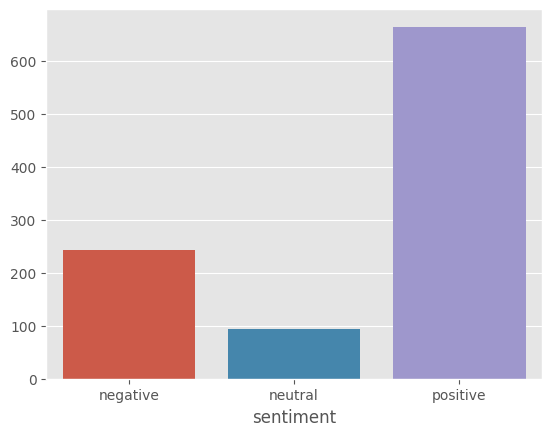

In [44]:
# Sentiment distribution
result_aceh = df_aceh.groupby(['sentiment']).size()

# plot the sentiment using sns
sns.barplot(x = result_aceh.index, y = result_aceh.values)

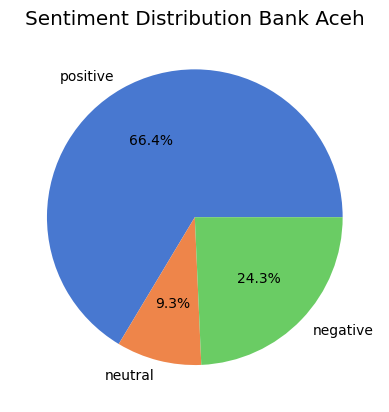

In [45]:
# Pie Chart
data_pie_a = df_aceh['sentiment'].value_counts().sort_index(ascending=False)
keys = data_pie_a.index
palette_color = sns.color_palette('muted')

#plotting
plt.pie(data_pie_a, labels = keys, colors=palette_color, autopct='%1.1f%%')
plt.title(f"Sentiment Distribution Bank Aceh")

plt.show()

## Add New Column (bank name

In [46]:
bank_name_3 = "Bank Aceh"

df_aceh['bank_name'] = bank_name_3

df_aceh

<ipython-input-46-a7c662c96212>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aceh['bank_name'] = bank_name_3


,reviewId,content,rating,at,sentiment,bank_name
0,da56a8ee-f3fa-4022-848e-6c557f26379a,Gimana sih iniii password sama username nya sa...,2,2023-10-31 14:05:50,negative,Bank Aceh
1,d8705599-f3ab-42bf-9efd-f735a1cea63e,"Aplikasinya sudah bagu, namun pembayaran payme...",3,2023-10-31 02:37:13,neutral,Bank Aceh
2,4a207011-0536-44ec-95b9-e44100f35a74,kartu ATM nya gratis gak,1,2023-10-31 02:13:39,negative,Bank Aceh
3,b0f8c886-3bf1-48dd-9f1c-fae19373f26d,"untuk saat ini udah bagus, cuman. tambahkan ew...",4,2023-10-28 02:34:26,positive,Bank Aceh
4,819a7403-fae2-4dcd-8124-9c4be57be616,Tolong top up dananya di tambahkan... Karena s...,1,2023-10-24 15:32:35,negative,Bank Aceh
...,...,...,...,...,...,...
995,c0e612d2-a150-4525-8158-dfea3e18ebc5,Mantap,4,2022-04-30 09:44:23,positive,Bank Aceh
996,02c5f55f-05aa-4d9f-81b3-05680c8f2e57,kenapa tiba2 pasword saya di blokir,1,2022-04-29 16:35:42,negative,Bank Aceh
997,9eea19fc-6a52-49af-8e55-db390f701e27,Mudah,5,2022-04-29 16:35:32,positive,Bank Aceh
998,e5c85061-a559-442e-91c0-e72f42e2bec5,Bantuan bas paya ilang,5,2022-04-28 02:17:28,positive,Bank Aceh


In [47]:
# Check null value
df_aceh.isnull().sum()

reviewId     0
content      0
rating       0
at           0
sentiment    0
bank_name    0
dtype: int64

# Merge 3 Dataframe

In [48]:
all_review = pd.concat([df_bsi, df_muamalat, df_aceh], ignore_index=True)

all_review

,reviewId,content,rating,at,sentiment,bank_name
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,2022-06-26 13:20:14,negative,Bank Syariah Indonesia
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,2021-09-25 13:26:04,positive,Bank Syariah Indonesia
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,2021-09-19 09:48:21,positive,Bank Syariah Indonesia
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,2021-08-03 14:40:21,positive,Bank Syariah Indonesia
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,2021-06-27 06:51:20,positive,Bank Syariah Indonesia
...,...,...,...,...,...,...
2994,c0e612d2-a150-4525-8158-dfea3e18ebc5,Mantap,4,2022-04-30 09:44:23,positive,Bank Aceh
2995,02c5f55f-05aa-4d9f-81b3-05680c8f2e57,kenapa tiba2 pasword saya di blokir,1,2022-04-29 16:35:42,negative,Bank Aceh
2996,9eea19fc-6a52-49af-8e55-db390f701e27,Mudah,5,2022-04-29 16:35:32,positive,Bank Aceh
2997,e5c85061-a559-442e-91c0-e72f42e2bec5,Bantuan bas paya ilang,5,2022-04-28 02:17:28,positive,Bank Aceh


In [49]:
all_review.isnull().sum()

reviewId     0
content      0
rating       0
at           0
sentiment    0
bank_name    0
dtype: int64

## Import to CSV

In [50]:
# all_review.to_csv('all_review_bank_app_2.csv', index=False)

# NLP & Machine Learning

In [51]:
all_review_2 = all_review.copy()

all_review_2

,reviewId,content,rating,at,sentiment,bank_name
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,2022-06-26 13:20:14,negative,Bank Syariah Indonesia
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,2021-09-25 13:26:04,positive,Bank Syariah Indonesia
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,2021-09-19 09:48:21,positive,Bank Syariah Indonesia
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,2021-08-03 14:40:21,positive,Bank Syariah Indonesia
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,2021-06-27 06:51:20,positive,Bank Syariah Indonesia
...,...,...,...,...,...,...
2994,c0e612d2-a150-4525-8158-dfea3e18ebc5,Mantap,4,2022-04-30 09:44:23,positive,Bank Aceh
2995,02c5f55f-05aa-4d9f-81b3-05680c8f2e57,kenapa tiba2 pasword saya di blokir,1,2022-04-29 16:35:42,negative,Bank Aceh
2996,9eea19fc-6a52-49af-8e55-db390f701e27,Mudah,5,2022-04-29 16:35:32,positive,Bank Aceh
2997,e5c85061-a559-442e-91c0-e72f42e2bec5,Bantuan bas paya ilang,5,2022-04-28 02:17:28,positive,Bank Aceh


## Data Preprocessing

In [52]:
new_column_order = ['reviewId', 'content', 'rating', 'at', 'bank_name', 'sentiment']

all_review_2 = all_review_2.reindex(columns=new_column_order)

all_review_2

,reviewId,content,rating,at,bank_name,sentiment
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,2022-06-26 13:20:14,Bank Syariah Indonesia,negative
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,2021-09-25 13:26:04,Bank Syariah Indonesia,positive
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,2021-09-19 09:48:21,Bank Syariah Indonesia,positive
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,2021-08-03 14:40:21,Bank Syariah Indonesia,positive
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,2021-06-27 06:51:20,Bank Syariah Indonesia,positive
...,...,...,...,...,...,...
2994,c0e612d2-a150-4525-8158-dfea3e18ebc5,Mantap,4,2022-04-30 09:44:23,Bank Aceh,positive
2995,02c5f55f-05aa-4d9f-81b3-05680c8f2e57,kenapa tiba2 pasword saya di blokir,1,2022-04-29 16:35:42,Bank Aceh,negative
2996,9eea19fc-6a52-49af-8e55-db390f701e27,Mudah,5,2022-04-29 16:35:32,Bank Aceh,positive
2997,e5c85061-a559-442e-91c0-e72f42e2bec5,Bantuan bas paya ilang,5,2022-04-28 02:17:28,Bank Aceh,positive


In [53]:
all_review_2 = all_review_2.rename(columns={'reviewId' : 'reviewid'})

all_review_2

,reviewid,content,rating,at,bank_name,sentiment
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,2022-06-26 13:20:14,Bank Syariah Indonesia,negative
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,2021-09-25 13:26:04,Bank Syariah Indonesia,positive
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,2021-09-19 09:48:21,Bank Syariah Indonesia,positive
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,2021-08-03 14:40:21,Bank Syariah Indonesia,positive
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,2021-06-27 06:51:20,Bank Syariah Indonesia,positive
...,...,...,...,...,...,...
2994,c0e612d2-a150-4525-8158-dfea3e18ebc5,Mantap,4,2022-04-30 09:44:23,Bank Aceh,positive
2995,02c5f55f-05aa-4d9f-81b3-05680c8f2e57,kenapa tiba2 pasword saya di blokir,1,2022-04-29 16:35:42,Bank Aceh,negative
2996,9eea19fc-6a52-49af-8e55-db390f701e27,Mudah,5,2022-04-29 16:35:32,Bank Aceh,positive
2997,e5c85061-a559-442e-91c0-e72f42e2bec5,Bantuan bas paya ilang,5,2022-04-28 02:17:28,Bank Aceh,positive


###  Encoding target (sentiment) to numerical

In [54]:
# Encoding target (sentiment) to numerical
encoding=[]

for index, row in all_review_2.iterrows():
    if row['sentiment'] == "negative" :
      encoding.append(-1)
    elif row['sentiment'] == "neutral" :
      encoding.append(0)
    else:
      encoding.append(1)

all_review_2['sentiment'] = encoding

all_review_2.head()

,reviewid,content,rating,at,bank_name,sentiment
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,2022-06-26 13:20:14,Bank Syariah Indonesia,-1
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,2021-09-25 13:26:04,Bank Syariah Indonesia,1
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,2021-09-19 09:48:21,Bank Syariah Indonesia,1
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,2021-08-03 14:40:21,Bank Syariah Indonesia,1
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,2021-06-27 06:51:20,Bank Syariah Indonesia,1


In [55]:
all_review_2 = all_review_2.drop(columns=['at'])

all_review_2

,reviewid,content,rating,bank_name,sentiment
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,Bank Syariah Indonesia,-1
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,Bank Syariah Indonesia,1
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,Bank Syariah Indonesia,1
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,Bank Syariah Indonesia,1
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,Bank Syariah Indonesia,1
...,...,...,...,...,...
2994,c0e612d2-a150-4525-8158-dfea3e18ebc5,Mantap,4,Bank Aceh,1
2995,02c5f55f-05aa-4d9f-81b3-05680c8f2e57,kenapa tiba2 pasword saya di blokir,1,Bank Aceh,-1
2996,9eea19fc-6a52-49af-8e55-db390f701e27,Mudah,5,Bank Aceh,1
2997,e5c85061-a559-442e-91c0-e72f42e2bec5,Bantuan bas paya ilang,5,Bank Aceh,1


### Text preprocessing

In [56]:
# remove URL
all_review_2['cleaned_text'] = all_review_2['content'].str.replace('https\S+', '', case=False)

# coverting to lowercase
all_review_2['cleaned_text'] = all_review_2['cleaned_text'].str.lower()

# replace all non-alphabetic characters with a space
all_review_2['cleaned_text'] = all_review_2['cleaned_text'].str.replace('[^a-zA-Z]', ' ', regex=True)

all_review_2

<ipython-input-56-bf1be563eefa>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_review_2['cleaned_text'] = all_review_2['content'].str.replace('https\S+', '', case=False)


,reviewid,content,rating,bank_name,sentiment,cleaned_text
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,Bank Syariah Indonesia,-1,tdk pake
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,Bank Syariah Indonesia,1,good
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,Bank Syariah Indonesia,1,ok
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,Bank Syariah Indonesia,1,sering eror mohon di perbaiki sistemnya
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,Bank Syariah Indonesia,1,aplikasi yang sangat bagus dan bermanfaat
...,...,...,...,...,...,...
2994,c0e612d2-a150-4525-8158-dfea3e18ebc5,Mantap,4,Bank Aceh,1,mantap
2995,02c5f55f-05aa-4d9f-81b3-05680c8f2e57,kenapa tiba2 pasword saya di blokir,1,Bank Aceh,-1,kenapa tiba pasword saya di blokir
2996,9eea19fc-6a52-49af-8e55-db390f701e27,Mudah,5,Bank Aceh,1,mudah
2997,e5c85061-a559-442e-91c0-e72f42e2bec5,Bantuan bas paya ilang,5,Bank Aceh,1,bantuan bas paya ilang


### Tokenization

In [57]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [58]:
# import word tokenize from nltk
from nltk.tokenize import word_tokenize

all_review_2['tokenized_text'] = all_review_2['cleaned_text'].apply(nltk.word_tokenize)

all_review_2.head()

,reviewid,content,rating,bank_name,sentiment,cleaned_text,tokenized_text
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,Bank Syariah Indonesia,-1,tdk pake,"[tdk, pake]"
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,Bank Syariah Indonesia,1,good,[good]
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,Bank Syariah Indonesia,1,ok,[ok]
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,Bank Syariah Indonesia,1,sering eror mohon di perbaiki sistemnya,"[sering, eror, mohon, di, perbaiki, sistemnya]"
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,Bank Syariah Indonesia,1,aplikasi yang sangat bagus dan bermanfaat,"[aplikasi, yang, sangat, bagus, dan, bermanfaat]"


### remove stopwords

In [59]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [60]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("indonesian"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

In [61]:
all_review_2['no_stopword_text'] = all_review_2['tokenized_text'].apply(remove_stopwords)

all_review_2

,reviewid,content,rating,bank_name,sentiment,cleaned_text,tokenized_text,no_stopword_text
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,Bank Syariah Indonesia,-1,tdk pake,"[tdk, pake]","[tdk, pake]"
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,Bank Syariah Indonesia,1,good,[good],[good]
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,Bank Syariah Indonesia,1,ok,[ok],[ok]
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,Bank Syariah Indonesia,1,sering eror mohon di perbaiki sistemnya,"[sering, eror, mohon, di, perbaiki, sistemnya]","[eror, mohon, perbaiki, sistemnya]"
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,Bank Syariah Indonesia,1,aplikasi yang sangat bagus dan bermanfaat,"[aplikasi, yang, sangat, bagus, dan, bermanfaat]","[aplikasi, bagus, bermanfaat]"
...,...,...,...,...,...,...,...,...
2994,c0e612d2-a150-4525-8158-dfea3e18ebc5,Mantap,4,Bank Aceh,1,mantap,[mantap],[mantap]
2995,02c5f55f-05aa-4d9f-81b3-05680c8f2e57,kenapa tiba2 pasword saya di blokir,1,Bank Aceh,-1,kenapa tiba pasword saya di blokir,"[kenapa, tiba, pasword, saya, di, blokir]","[pasword, blokir]"
2996,9eea19fc-6a52-49af-8e55-db390f701e27,Mudah,5,Bank Aceh,1,mudah,[mudah],[mudah]
2997,e5c85061-a559-442e-91c0-e72f42e2bec5,Bantuan bas paya ilang,5,Bank Aceh,1,bantuan bas paya ilang,"[bantuan, bas, paya, ilang]","[bantuan, bas, paya, ilang]"


### Stemming with sastrawi

In [62]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


In [63]:
# import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stem every word
all_review_2['stemmed'] = all_review_2['no_stopword_text'].apply(lambda x: [stemmer.stem(y) for y in x])

In [64]:
all_review_2.head()

,reviewid,content,rating,bank_name,sentiment,cleaned_text,tokenized_text,no_stopword_text,stemmed
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,Bank Syariah Indonesia,-1,tdk pake,"[tdk, pake]","[tdk, pake]","[tdk, pake]"
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,Bank Syariah Indonesia,1,good,[good],[good],[good]
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,Bank Syariah Indonesia,1,ok,[ok],[ok],[ok]
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,Bank Syariah Indonesia,1,sering eror mohon di perbaiki sistemnya,"[sering, eror, mohon, di, perbaiki, sistemnya]","[eror, mohon, perbaiki, sistemnya]","[eror, mohon, baik, sistem]"
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,Bank Syariah Indonesia,1,aplikasi yang sangat bagus dan bermanfaat,"[aplikasi, yang, sangat, bagus, dan, bermanfaat]","[aplikasi, bagus, bermanfaat]","[aplikasi, bagus, manfaat]"


In [65]:
all_review_2['text_string'] = all_review_2['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>1]))

all_review_2.head()

,reviewid,content,rating,bank_name,sentiment,cleaned_text,tokenized_text,no_stopword_text,stemmed,text_string
0,f93e96d7-6b2b-40a1-bcfb-85cf7855af04,Tdk pake.,1,Bank Syariah Indonesia,-1,tdk pake,"[tdk, pake]","[tdk, pake]","[tdk, pake]",tdk pake
1,ca45346f-d5e4-4d24-b0ef-d27a240f2475,GOOD,5,Bank Syariah Indonesia,1,good,[good],[good],[good],good
2,efae59b6-cb54-4221-8089-0c511ae56a28,Ok,5,Bank Syariah Indonesia,1,ok,[ok],[ok],[ok],ok
3,a18d75e3-cae5-44b1-886a-5c1ab73ec079,"Sering eror, mohon di perbaiki sistemnya",5,Bank Syariah Indonesia,1,sering eror mohon di perbaiki sistemnya,"[sering, eror, mohon, di, perbaiki, sistemnya]","[eror, mohon, perbaiki, sistemnya]","[eror, mohon, baik, sistem]",eror mohon baik sistem
4,c8478096-e56e-415d-b2a2-a26f7bf4f095,Aplikasi yang sangat bagus dan bermanfaat,5,Bank Syariah Indonesia,1,aplikasi yang sangat bagus dan bermanfaat,"[aplikasi, yang, sangat, bagus, dan, bermanfaat]","[aplikasi, bagus, bermanfaat]","[aplikasi, bagus, manfaat]",aplikasi bagus manfaat


In [66]:
all_review_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviewid          2999 non-null   object
 1   content           2999 non-null   object
 2   rating            2999 non-null   int64 
 3   bank_name         2999 non-null   object
 4   sentiment         2999 non-null   int64 
 5   cleaned_text      2999 non-null   object
 6   tokenized_text    2999 non-null   object
 7   no_stopword_text  2999 non-null   object
 8   stemmed           2999 non-null   object
 9   text_string       2999 non-null   object
dtypes: int64(2), object(8)
memory usage: 234.4+ KB


### Change data type for (text_string)

In [67]:
all_review_2['text_string'] = all_review_2['text_string'].astype('str')
all_review_2['text_string'] = all_review_2['text_string'].astype(pd.StringDtype())

In [68]:
all_review_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviewid          2999 non-null   object
 1   content           2999 non-null   object
 2   rating            2999 non-null   int64 
 3   bank_name         2999 non-null   object
 4   sentiment         2999 non-null   int64 
 5   cleaned_text      2999 non-null   object
 6   tokenized_text    2999 non-null   object
 7   no_stopword_text  2999 non-null   object
 8   stemmed           2999 non-null   object
 9   text_string       2999 non-null   string
dtypes: int64(2), object(7), string(1)
memory usage: 234.4+ KB


### Wordcloud

In [69]:
!pip install wordcloud

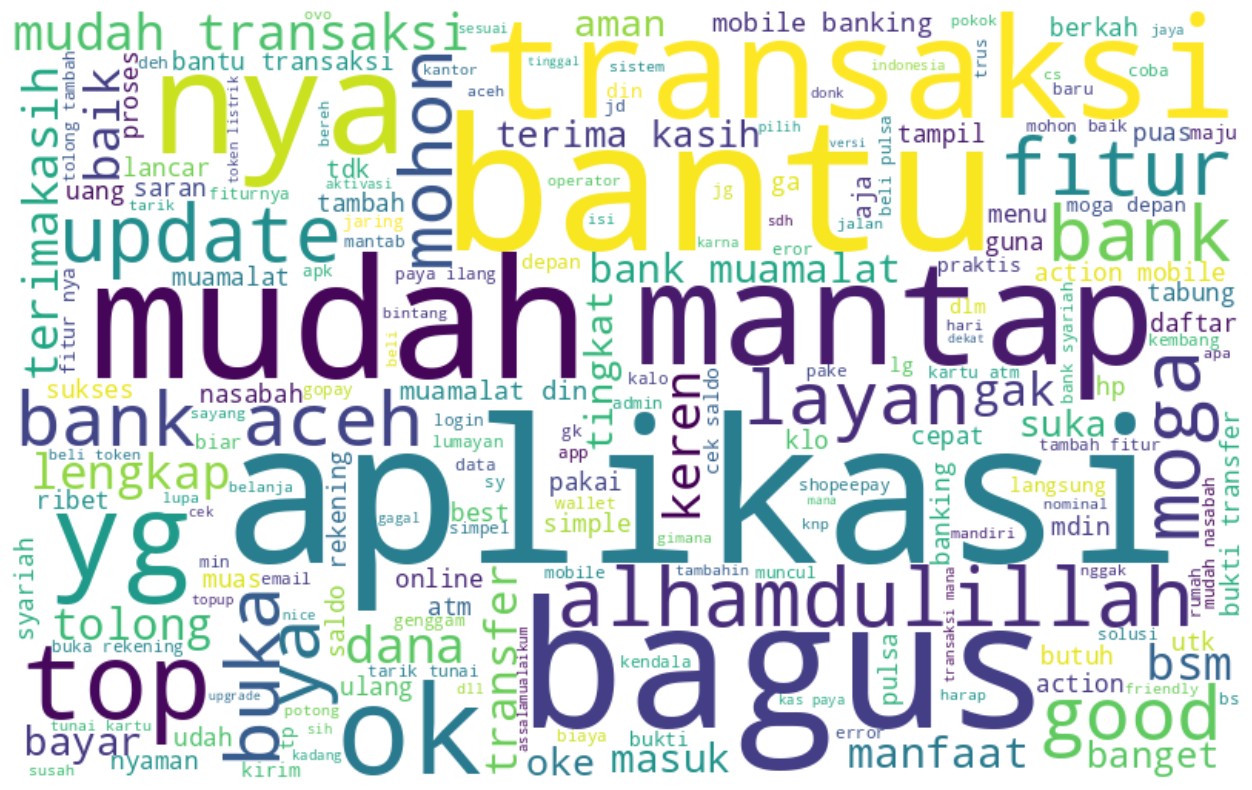

In [70]:
# filter for positive sentiment
all_review_p = all_review_2[all_review_2['sentiment'] ==1]
all_words_lem = ' '.join([word for word in all_review_p['text_string']])

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

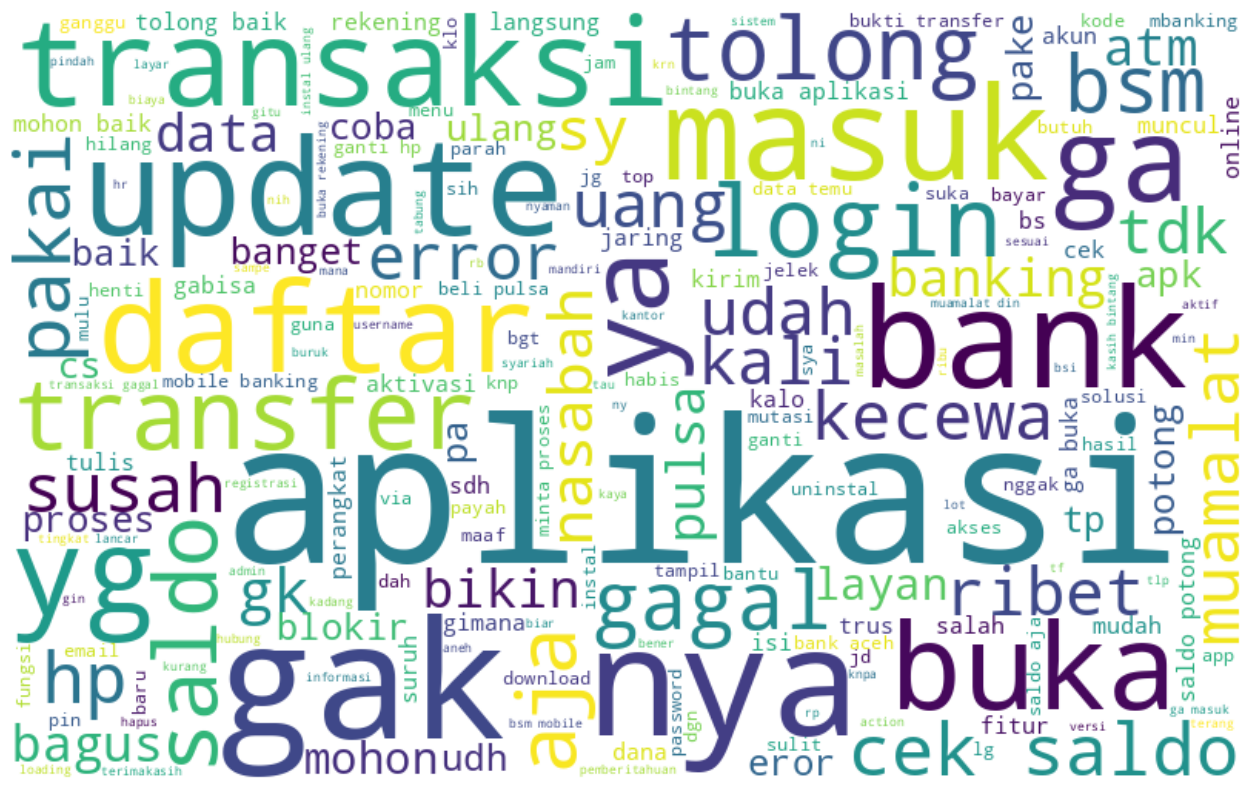

In [71]:
# filter for negative sentiment
all_review_neg = all_review_2[all_review_2['sentiment'] ==-1]
all_words_lem = ' '.join([word for word in all_review_neg['text_string']])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

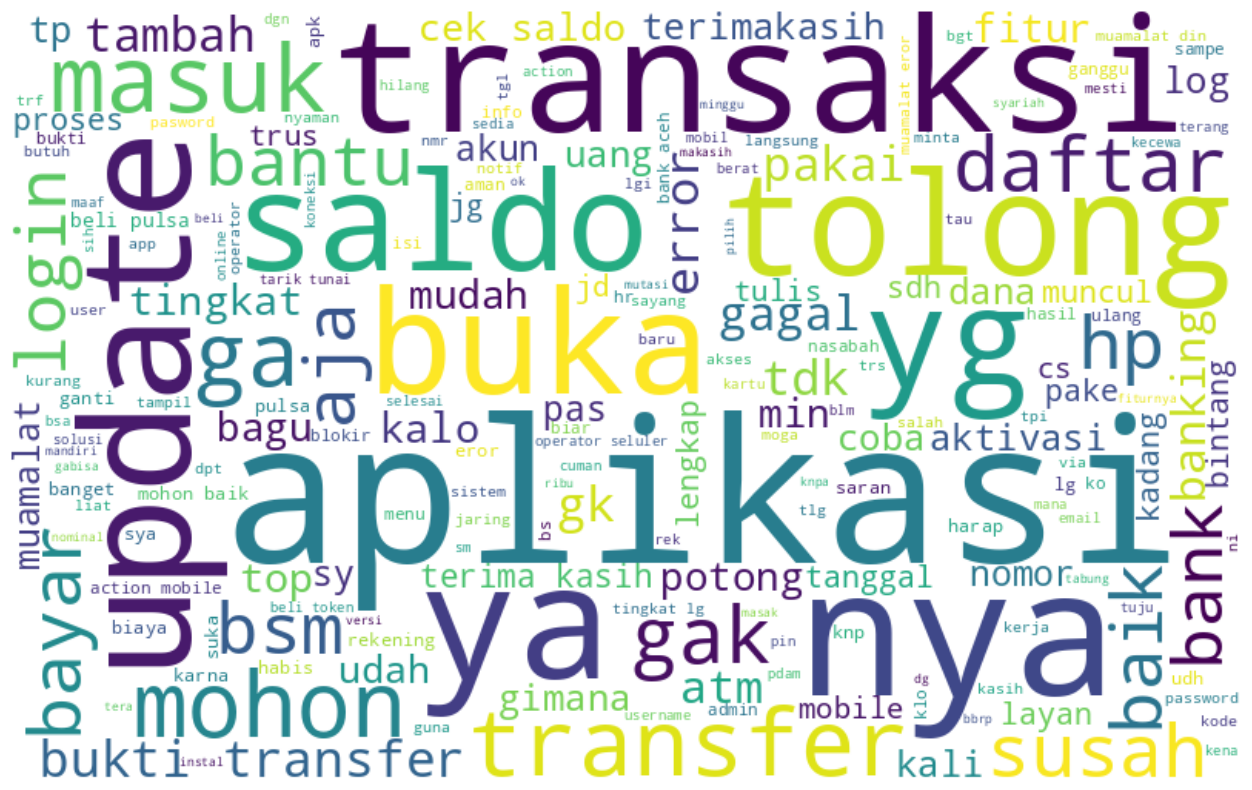

In [72]:
# filter for neutral sentiment
all_review_neu = all_review_2[all_review_2['sentiment'] ==0]
all_words_lem = ' '.join([word for word in all_review_neu['text_string']])


wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

### Vectorization

In [73]:
corpus = []
for i in all_review_2["text_string"]:
    msg = ''.join([row for row in i])
    corpus.append(msg)

print("The First 10 lines in corpus : \n")
print(*corpus[:10], sep="\n")

The First 10 lines in corpus : 

tdk pake
good
ok
eror mohon baik sistem
aplikasi bagus manfaat

praktis muas
ok

is ok


### Converting the corpus in vector form

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Changing text data in to numbers.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

# Let's have a look at our feature
X.dtype

dtype('float64')

In [75]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Model Building

In [76]:
from sklearn.model_selection import train_test_split # Split Data

# create target
y = all_review_2['sentiment']

# split the testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
y.value_counts()

 1    1812
-1     864
 0     323
Name: sentiment, dtype: int64

In [78]:
y_train.value_counts()

 1    1464
-1     682
 0     253
Name: sentiment, dtype: int64

In [79]:
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics
# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# ML Model Evaluation
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics

In [80]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.7333333333333333

In [81]:
# Testing on the following classifiers
classifiers = [
    GradientBoostingClassifier(),
    LogisticRegression(),
    RandomForestClassifier(),
    SVC()

]

for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {
    0: "GradientBoosting",
    1: "LogisticRegression",
    2: "RandomForest",
    3:  "SVC"
}

In [82]:
# Cross-Validation
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train, scoring="accuracy", cv=5)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

GradientBoosting: 0.734477 
LogisticRegression: 0.759074 
RandomForest: 0.758657 
SVC: 0.769078 


In [83]:
for i, model in enumerate(classifiers):
    model.fit(X_train, y_train)  # Melatih model pada data pelatihan
    y_pred = model.predict(X_test)  # Melakukan prediksi pada data pengujian
    accuracy = accuracy_score(y_test, y_pred)  # Mengukur akurasi pada data pengujian
    print("%s: %f" % (pipe_dict[i], accuracy))

GradientBoosting: 0.700000
LogisticRegression: 0.750000
RandomForest: 0.731667
SVC: 0.756667


In [90]:
import itertools

In [91]:
from matplotlib import rc, rcParams
def plot_confusion_matrix(
    cm, classes,
    normalize=False,
    title='Confusion Matrix',
    cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)
    plt.rcParams.update({'font.size': 16})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color="blue")
    plt.yticks(tick_marks, classes, color="blue")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


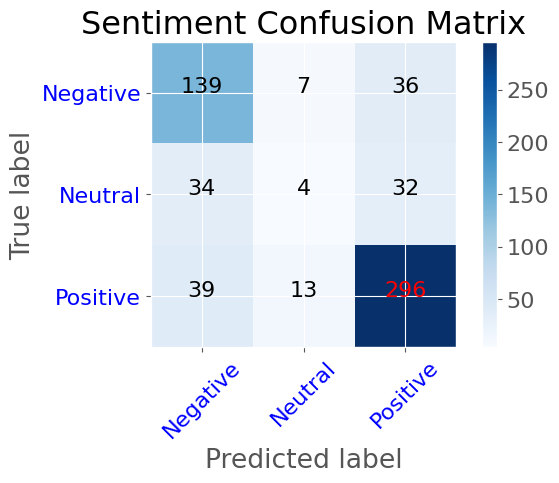

In [93]:
cfm = confusion_matrix(y_test, y_pred=y_pred)
plot_confusion_matrix(
    cfm,
    normalize=False, # True dalam persen, false angka sebenernya
    classes=['Negative','Neutral', 'Positive'],
    title='Sentiment Confusion Matrix'
)

### Handling Imbalance

In [84]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [85]:
# split the testing and training data from resampling data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [86]:
# Cross-Validation with resampling data
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train_res, y_train_res, scoring="accuracy", cv=5)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

GradientBoosting: 0.785307 
LogisticRegression: 0.811490 
RandomForest: 0.881384 
SVC: 0.899370 


In [87]:
for i, model in enumerate(classifiers):
    model.fit(X_train_res, y_train_res)  # Melatih model pada data pelatihan
    y_pred = model.predict(X_test)  # Melakukan prediksi pada data pengujian
    accuracy = accuracy_score(y_test, y_pred)  # Mengukur akurasi pada data pengujian
    print("%s: %f" % (pipe_dict[i], accuracy))

GradientBoosting: 0.688333
LogisticRegression: 0.671667
RandomForest: 0.713333
SVC: 0.731667
